<a href="https://colab.research.google.com/github/derrionrobinson/Machine-Learning-Practice/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import time

Predictions: tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
Loss: tensor(1763.8848)
Gradient: tensor([4517.2969,   82.6000])
Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


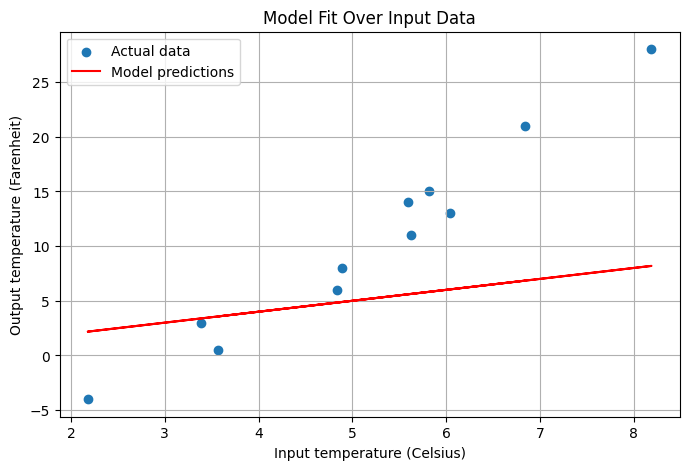

In [99]:
#In class Linear Nodel
# Data (your target and input values)
celsius = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
farenheit = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
farenheit_normal = 0.1 * farenheit #normalize input

# Initialize parameters
w = torch.ones(1)
b = torch.zeros(1)

# Training Model
def model(farenheit, w, b):
    return w * farenheit + b

# Forward pass
t_pred = model(farenheit, w, b)
print("Predictions:", t_pred)

# Loss Function
def CostLoss_function(t_pred, celsius):
    squared_diffs = (t_pred - celsius)**2
    return squared_diffs.mean()

# Compute Loss
CostLoss = CostLoss_function(t_pred, celsius)
print("Loss:", CostLoss)

# Compute Gradient of Loss
parameters = torch.tensor([1.0, 0.0], requires_grad=True)
CostLoss = CostLoss_function(model(farenheit, *parameters), celsius)
CostLoss.backward()
parameters.grad
print("Gradient:", parameters.grad)

# Training Loop
def training_loop(n_epochs, learning_rate, parameters, farenheit, celsius):
  for epoch in range(1, n_epochs +1):
    if parameters.grad is not None:
      parameters.grad.zero_()

    t_pred = model(farenheit, *parameters)
    CostLoss = CostLoss_function(t_pred, celsius)
    CostLoss.backward()

    with torch.no_grad():
      parameters -= learning_rate * parameters.grad

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(CostLoss)))

  return parameters

training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    parameters = torch.tensor([1.0, 0.0], requires_grad=True),
    farenheit = farenheit_normal,
    celsius = celsius
)

# After training
final_params = parameters.detach()
t_pred = model(farenheit_normal, *final_params)

plt.figure(figsize=(8,5))
plt.scatter(farenheit_normal, celsius, label='Actual data')
plt.plot(farenheit_normal, t_pred, color='red', label='Model predictions')
plt.xlabel('Input temperature (Celsius)')
plt.ylabel('Output temperature (Farenheit)')
plt.title('Model Fit Over Input Data')
plt.legend()
plt.grid(True)
plt.show()


Predictions: tensor([16.3149, 36.8381, 39.6924, 75.2661, 37.3269, 28.8021, 14.8821,  6.9324,
        28.2656, 42.5216, 53.6256], grad_fn=<AddBackward0>)
Loss: tensor(675.7944, grad_fn=<MeanBackward0>)
Gradient: tensor([1739.5315,  279.6790,   48.1760])
Epoch 500, Loss 4.195781
Epoch 1000, Loss 3.548735
Epoch 1500, Loss 3.478307
Epoch 2000, Loss 3.446147
Epoch 2500, Loss 3.417074
Epoch 3000, Loss 3.388778
Epoch 3500, Loss 3.361097
Epoch 4000, Loss 3.334007
Epoch 4500, Loss 3.307492
Epoch 5000, Loss 3.281545

Learned parameters [w2, w1, b]: tensor([ 0.5939, -0.9547, -1.9021], requires_grad=True)


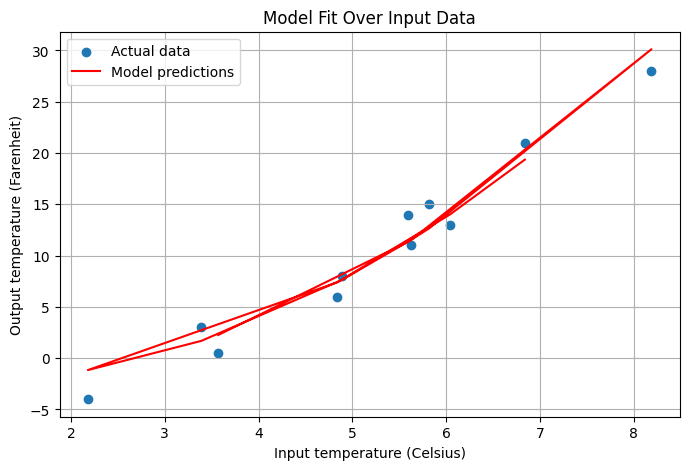

In [100]:
import torch

#Problem 1a and 1b Training 1

celsius = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
farenheit = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
farenheit_normal = 0.1 * farenheit  # normalize input

# Initialize parameters: [w2, w1, b]
parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

# Define quadratic model
def model(farenheit, w2, w1, b):
    return w2 * farenheit**2 + w1 * farenheit + b

# Forward pass
t_pred = model(farenheit_normal, *parameters)
print("Predictions:", t_pred)

# Define loss function
def cost_fn(t_pred, celsius):
    squared_diffs = (t_pred - celsius)**2
    return squared_diffs.mean()

# Compute loss
cost = cost_fn(t_pred, celsius)
print("Loss:", cost)

# Compute Gradient of Loss
cost = cost_fn(model(farenheit_normal, *parameters), celsius)

# Backward Pass
cost.backward()
print("Gradient:", parameters.grad)

# Training loop
def training_loop(n_epochs, learning_rate, parameters, farenheit, celsius):
    for epoch in range(1, n_epochs + 1):
        if parameters.grad is not None:
            parameters.grad.zero_()

        t_pred = model(farenheit, *parameters)
        cost = cost_fn(t_pred, celsius)
        cost.backward()

        with torch.no_grad():
            parameters -= learning_rate *parameters.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(cost)))

    return parameters

# Training 1
trained_parameters = training_loop(
    n_epochs=5000,
    learning_rate=.0008,
    parameters=parameters,
    farenheit=farenheit_normal,
    celsius=celsius
)

print("\nLearned parameters [w2, w1, b]:", trained_parameters)

# After training
final_parameters = parameters.detach()
t_pred = model(farenheit_normal, *final_parameters)

plt.figure(figsize=(8,5))
plt.scatter(farenheit_normal, celsius, label='Actual data')
plt.plot(farenheit_normal, t_pred, color='red', label='Model predictions')
plt.xlabel('Input temperature (Celsius)')
plt.ylabel('Output temperature (Farenheit)')
plt.title('Model Fit Over Input Data')
plt.legend()
plt.grid(True)
plt.show()

Predictions: tensor([16.3149, 36.8381, 39.6924, 75.2661, 37.3269, 28.8021, 14.8821,  6.9324,
        28.2656, 42.5216, 53.6256], grad_fn=<AddBackward0>)
Loss: tensor(675.7944, grad_fn=<MeanBackward0>)
Gradient: tensor([1739.5315,  279.6790,   48.1760])
Epoch 500, Loss 5.380124
Epoch 1000, Loss 3.861909
Epoch 1500, Loss 3.570068
Epoch 2000, Loss 3.501500
Epoch 2500, Loss 3.473751
Epoch 3000, Loss 3.453630
Epoch 3500, Loss 3.435097
Epoch 4000, Loss 3.417055
Epoch 4500, Loss 3.399295
Epoch 5000, Loss 3.381780

Learned parameters [w2, w1, b]: tensor([ 0.6066, -1.0958, -1.5411], requires_grad=True)


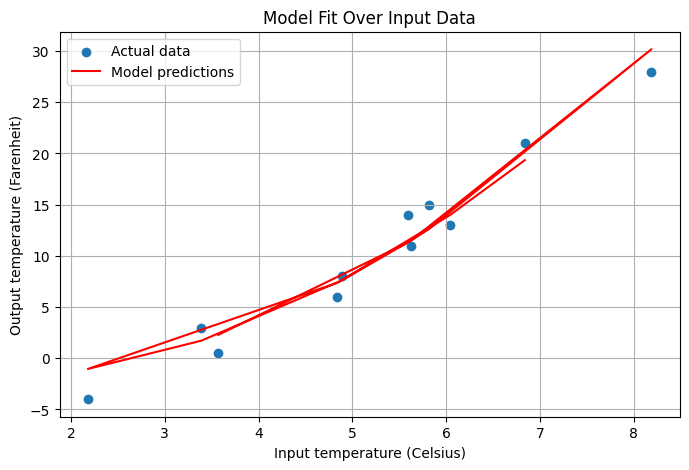

In [101]:
#Problem 1a and 1b - Training Model 2

celsius = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
farenheit = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
farenheit_normal = 0.1 * farenheit  # normalize input

# Initialize parameters: [w2, w1, b]
parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

# Define quadratic model
def model(farenheit, w2, w1, b):
    return w2 * farenheit**2 + w1 * farenheit + b

# Forward pass
t_pred = model(farenheit_normal, *parameters)
print("Predictions:", t_pred)

# Define loss function
def cost_fn(t_pred, celsius):
    squared_diffs = (t_pred - celsius)**2
    return squared_diffs.mean()

# Compute loss
cost = cost_fn(t_pred, celsius)
print("Loss:", cost)

# Compute Gradient of Loss
cost = cost_fn(model(farenheit_normal, *parameters), celsius)
cost.backward()
print("Gradient:", parameters.grad)

# Training loop
def training_loop(n_epochs, learning_rate, parameters, farenheit, celsius):
    for epoch in range(1, n_epochs + 1):
        if parameters.grad is not None:
            parameters.grad.zero_()

        t_pred = model(farenheit, *parameters)
        cost = cost_fn(t_pred, celsius)
        cost.backward()

        with torch.no_grad():
            parameters -= learning_rate *parameters.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(cost)))

    return parameters

# Training 2
trained_parameters = training_loop(
    n_epochs=5000,
    learning_rate=.0005,
    parameters=parameters,
    farenheit=farenheit_normal,
    celsius=celsius
)

print("\nLearned parameters [w2, w1, b]:", trained_parameters)

# After training
final_parameters = parameters.detach()
t_pred = model(farenheit_normal, *final_parameters)

plt.figure(figsize=(8,5))
plt.scatter(farenheit_normal, celsius, label='Actual data')
plt.plot(farenheit_normal, t_pred, color='red', label='Model predictions')
plt.xlabel('Input temperature (Celsius)')
plt.ylabel('Output temperature (Farenheit)')
plt.title('Model Fit Over Input Data')
plt.legend()
plt.grid(True)
plt.show()

Predictions: tensor([16.3149, 36.8381, 39.6924, 75.2661, 37.3269, 28.8021, 14.8821,  6.9324,
        28.2656, 42.5216, 53.6256], grad_fn=<AddBackward0>)
Loss: tensor(675.7944, grad_fn=<MeanBackward0>)
Gradient: tensor([1739.5315,  279.6790,   48.1760])
Epoch 500, Loss 8.644965
Epoch 1000, Loss 6.124641
Epoch 1500, Loss 4.845726
Epoch 2000, Loss 4.194871
Epoch 2500, Loss 3.861782
Epoch 3000, Loss 3.689472
Epoch 3500, Loss 3.598522
Epoch 4000, Loss 3.548753
Epoch 4500, Loss 3.519840
Epoch 5000, Loss 3.501493

Learned parameters [w2, w1, b]: tensor([ 0.6078, -1.1697, -1.1362], requires_grad=True)


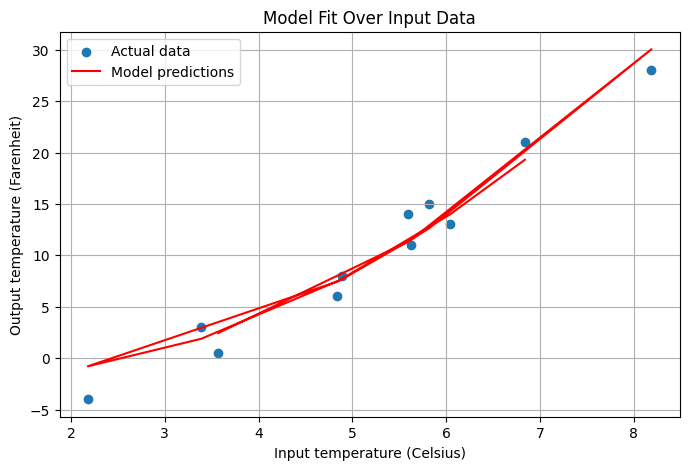

In [102]:
#Problem 1a and 1b - Training Model 3

celsius = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
farenheit = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
farenheit_normal = 0.1 * farenheit  # normalize input

# Initialize parameters: [w2, w1, b]
parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

# Define quadratic model
def model(farenheit, w2, w1, b):
    return w2 * farenheit**2 + w1 * farenheit + b

# Forward pass
t_pred = model(farenheit_normal, *parameters)
print("Predictions:", t_pred)

# Define loss function
def cost_fn(t_pred, celsius):
    squared_diffs = (t_pred - celsius)**2
    return squared_diffs.mean()

# Compute loss
cost = cost_fn(t_pred, celsius)
print("Loss:", cost)

# Compute Gradient of Loss
cost = cost_fn(model(farenheit_normal, *parameters), celsius)

# Backward Pass
cost.backward()
print("Gradient:", parameters.grad)

# Training loop
def training_loop(n_epochs, learning_rate, parameters, farenheit, celsius):
    for epoch in range(1, n_epochs + 1):
        if parameters.grad is not None:
            parameters.grad.zero_()

        t_pred = model(farenheit, *parameters)
        cost = cost_fn(t_pred, celsius)
        cost.backward()

        with torch.no_grad():
            parameters -= learning_rate *parameters.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(cost)))

    return parameters

# Training 3
trained_parameters = training_loop(
    n_epochs=5000,
    learning_rate=.0002,
    parameters=parameters,
    farenheit=farenheit_normal,
    celsius=celsius
)

print("\nLearned parameters [w2, w1, b]:", trained_parameters)

# After training
final_parameters = parameters.detach()
t_pred = model(farenheit_normal, *final_parameters)

plt.figure(figsize=(8,5))
plt.scatter(farenheit_normal, celsius, label='Actual data')
plt.plot(farenheit_normal, t_pred, color='red', label='Model predictions')
plt.xlabel('Input temperature (Celsius)')
plt.ylabel('Output temperature (Farenheit)')
plt.title('Model Fit Over Input Data')
plt.legend()
plt.grid(True)
plt.show()

Predictions: tensor([16.3149, 36.8381, 39.6924, 75.2661, 37.3269, 28.8021, 14.8821,  6.9324,
        28.2656, 42.5216, 53.6256], grad_fn=<AddBackward0>)
Loss: tensor(675.7944, grad_fn=<MeanBackward0>)
Gradient: tensor([1739.5315,  279.6790,   48.1760])
Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744

Learned parameters [w2, w1, b]: tensor([ 0.5570, -0.8881, -0.8753], requires_grad=True)


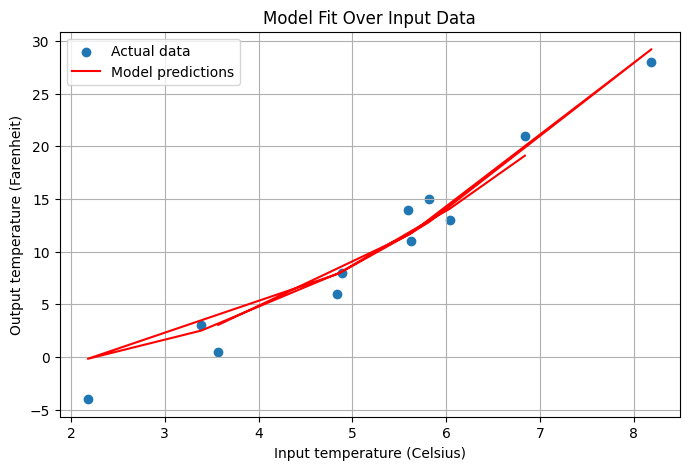

In [103]:
#Problem 1a and 1b - Training Model 4

celsius = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
farenheit = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
farenheit_normal = 0.1 * farenheit  # normalize input

# Initialize parameters: [w2, w1, b]
parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

# Define quadratic model
def model(farenheit, w2, w1, b):
    return w2 * farenheit**2 + w1 * farenheit + b

# Forward pass
t_pred = model(farenheit_normal, *parameters)
print("Predictions:", t_pred)

# Define loss function
def cost_fn(t_pred, celsius):
    squared_diffs = (t_pred - celsius)**2
    return squared_diffs.mean()

# Compute loss
cost = cost_fn(t_pred, celsius)
print("Loss:", cost)

# Compute Gradient of Loss
cost = cost_fn(model(farenheit_normal, *parameters), celsius)

# Backward Pass
cost.backward()
print("Gradient:", parameters.grad)

# Training loop
def training_loop(n_epochs, learning_rate, parameters, farenheit, celsius):
    for epoch in range(1, n_epochs + 1):
        if parameters.grad is not None:
            parameters.grad.zero_()

        t_pred = model(farenheit, *parameters)
        cost = cost_fn(t_pred, celsius)
        cost.backward()

        with torch.no_grad():
            parameters -= learning_rate *parameters.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(cost)))

    return parameters

# Training 4
trained_parameters = training_loop(
    n_epochs=5000,
    learning_rate=.0001,
    parameters=parameters,
    farenheit=farenheit_normal,
    celsius=celsius
)

print("\nLearned parameters [w2, w1, b]:", trained_parameters)

# After training
final_parameters = parameters.detach()
t_pred = model(farenheit_normal, *final_parameters)

plt.figure(figsize=(8,5))
plt.scatter(farenheit_normal, celsius, label='Actual data')
plt.plot(farenheit_normal, t_pred, color='red', label='Model predictions')
plt.xlabel('Input temperature (Celsius)')
plt.ylabel('Output temperature (Farenheit)')
plt.title('Model Fit Over Input Data')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
#Problem 2
url = 'https://raw.githubusercontent.com/derrionrobinson/Machine-Learning-Practice/refs/heads/main/Housing.csv'
df = pd.read_csv(url)

# Convert categorical yes/no columns to numeric
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})

# Input features and target variable
feature_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_column = 'price'

input_features = df[feature_columns].values
target_prices = df[target_column].values.reshape(-1, 1)

# Training Split
features_train, features_valid, prices_train, prices_valid = train_test_split(
    input_features, target_prices, test_size=0.2, random_state=0
)

# Standardize inputs
feature_scaler = StandardScaler()
features_train_scaled = feature_scaler.fit_transform(features_train)
features_valid_scaled = feature_scaler.transform(features_valid)

# Standardize outputs
price_scaler = StandardScaler()
prices_train_scaled = price_scaler.fit_transform(prices_train)
prices_valid_scaled = price_scaler.transform(prices_valid)

# Convert to torch tensors
features_train_tensor = torch.tensor(features_train_scaled, dtype=torch.float32)
features_valid_tensor = torch.tensor(features_valid_scaled, dtype=torch.float32)
prices_train_tensor = torch.tensor(prices_train_scaled, dtype=torch.float32).ravel()
prices_valid_tensor = torch.tensor(prices_valid_scaled, dtype=torch.float32).ravel()

#Linear Regression
def linear_regression_model(features, parameters):
    weights = parameters[:-1]
    bias = parameters[-1]
    return features @ weights + bias  # Linear transformation

# Mean Squared Error (MSE) Loss (Loss)
def mean_squared_error(predictions, targets):
    return ((predictions - targets) ** 2).mean()

# Training Model
def train_model(num_epochs, learning_rate, parameters, X_train, y_train, X_valid, y_valid):
    for epoch in range(1, num_epochs + 1):
        if parameters.grad is not None:
            parameters.grad.zero_()

        # Forward pass
        y_pred_train = linear_regression_model(X_train, parameters)
        train_loss = mean_squared_error(y_pred_train, y_train)

        # Backward pass
        train_loss.backward()

        # Gradient descent
        with torch.no_grad():
            parameters -= learning_rate * parameters.grad

        # Every 500 epochs
        if epoch % 500 == 0:
            y_pred_valid = linear_regression_model(X_valid, parameters)
            valid_loss = mean_squared_error(y_pred_valid, y_valid)
            print(f"Epoch {epoch}, LR={learning_rate:.4f}, Train Loss={train_loss.item():.4f}, Val Loss={valid_loss.item():.4f}")

    return parameters

#Testing Different Learning Rates
learning_rate_candidates = [0.1, 0.01, 0.001, 0.0001]
best_validation_loss = float('inf')
best_parameters = None

for lr in learning_rate_candidates:
    print(f"\nTraining with learning rate = {lr}")

    # Initialize parameters
    initial_parameters = torch.ones(6, requires_grad=True)

    trained_parameters = train_model(
        num_epochs=5000,
        learning_rate=lr,
        parameters=initial_parameters,
        X_train=features_train_tensor,
        y_train=prices_train_tensor,
        X_valid=features_valid_tensor,
        y_valid=prices_valid_tensor
    )

    # Evaluate on validation data
    final_valid_pred = linear_regression_model(features_valid_tensor, trained_parameters)
    final_valid_loss = mean_squared_error(final_valid_pred, prices_valid_tensor)

    if final_valid_loss < best_validation_loss:
        best_validation_loss = final_valid_loss
        best_parameters = trained_parameters.clone()

print("\nBest Validation Loss:", best_validation_loss.item())
print("Best Parameters [w1–w5, b]:", best_parameters.tolist())


/tmp/ipython-input-1501186068.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})



Training with learning rate = 0.1
Epoch 500, LR=0.1000, Train Loss=0.4462, Val Loss=0.3221
Epoch 1000, LR=0.1000, Train Loss=0.4462, Val Loss=0.3221
Epoch 1500, LR=0.1000, Train Loss=0.4462, Val Loss=0.3221
Epoch 2000, LR=0.1000, Train Loss=0.4462, Val Loss=0.3221
Epoch 2500, LR=0.1000, Train Loss=0.4462, Val Loss=0.3221
Epoch 3000, LR=0.1000, Train Loss=0.4462, Val Loss=0.3221
Epoch 3500, LR=0.1000, Train Loss=0.4462, Val Loss=0.3221
Epoch 4000, LR=0.1000, Train Loss=0.4462, Val Loss=0.3221
Epoch 4500, LR=0.1000, Train Loss=0.4462, Val Loss=0.3221
Epoch 5000, LR=0.1000, Train Loss=0.4462, Val Loss=0.3221

Training with learning rate = 0.01
Epoch 500, LR=0.0100, Train Loss=0.4462, Val Loss=0.3221
Epoch 1000, LR=0.0100, Train Loss=0.4462, Val Loss=0.3221
Epoch 1500, LR=0.0100, Train Loss=0.4462, Val Loss=0.3221
Epoch 2000, LR=0.0100, Train Loss=0.4462, Val Loss=0.3221
Epoch 2500, LR=0.0100, Train Loss=0.4462, Val Loss=0.3221
Epoch 3000, LR=0.0100, Train Loss=0.4462, Val Loss=0.3221
Epo

In [105]:
#Problem 3a
url = 'https://raw.githubusercontent.com/derrionrobinson/Machine-Learning-Practice/refs/heads/main/Housing.csv'
df = pd.read_csv(url)

# Convert categorical yes/no columns to numeric
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})

# Input features and target variable
feature_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_column = 'price'

input_features = df[feature_columns].values
target_prices = df[target_column].values.reshape(-1, 1)

# Training Split
features_train, features_valid, prices_train, prices_valid = train_test_split(
    input_features, target_prices, test_size=0.2, random_state=0
)

# Standardize inputs
feature_scaler = StandardScaler()
features_train_scaled = feature_scaler.fit_transform(features_train)
features_valid_scaled = feature_scaler.transform(features_valid)

# Standardize outputs
price_scaler = StandardScaler()
prices_train_scaled = price_scaler.fit_transform(prices_train)
prices_valid_scaled = price_scaler.transform(prices_valid)

# Convert to torch tensors
features_train_tensor = torch.tensor(features_train_scaled, dtype=torch.float32)
features_valid_tensor = torch.tensor(features_valid_scaled, dtype=torch.float32)
prices_train_tensor = torch.tensor(prices_train_scaled, dtype=torch.float32)
prices_valid_tensor = torch.tensor(prices_valid_scaled, dtype=torch.float32)

# Neural Network
input_dim = features_train_tensor.shape[1]
hidden_dim = 8
output_dim = 1

model = nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim)
)

# Loss Function
LossFunction = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
n_epochs = 200
start_time = time.time()

for epoch in range(1, n_epochs + 1):
    model.train()

    # Forward pass
    outputs = model(features_train_tensor)
    loss = LossFunction(outputs, prices_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Every 20 Epochs
    if epoch % 20 == 0:
        model.eval()
        with torch.no_grad():
            val_outputs = model(features_valid_tensor)
            val_loss = LossFunction(val_outputs, prices_valid_tensor).item()

        # Results
        print(f"Epoch {epoch:5} , Training Loss={loss.item():16.4f} , Validation Loss={val_loss:19.4f}")
        model.train()


end_time = time.time()
training_time = end_time - start_time

# Evaluation
model.eval()
with torch.no_grad():
    # Training Loss
    train_outputs = model(features_train_tensor)
    final_train_loss = LossFunction(train_outputs, prices_train_tensor).item()

    # Validation Predictions
    prices_pred_valid = model(features_valid_tensor)

    # Validation Loss
    final_val_loss = LossFunction(prices_pred_valid, prices_valid_tensor).item()

    # Convert predictions back to original scale
    prices_pred_orig = price_scaler.inverse_transform(prices_pred_valid.numpy())
    prices_valid_orig = price_scaler.inverse_transform(prices_valid_tensor.numpy())

    # Regression metric: RMSE (Root Mean Squared Error)
    rmse = np.sqrt(np.mean((prices_pred_orig - prices_valid_orig)**2))


print(f"Total Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Validation Loss: {final_val_loss:.4f}")
print(f"Evaluation Accuracy: {rmse:.2f}")

/tmp/ipython-input-865578497.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})


Epoch    20 , Training Loss=          0.4888 , Validation Loss=             0.3859
Epoch    40 , Training Loss=          0.4489 , Validation Loss=             0.3306
Epoch    60 , Training Loss=          0.4346 , Validation Loss=             0.3328
Epoch    80 , Training Loss=          0.4291 , Validation Loss=             0.3225
Epoch   100 , Training Loss=          0.4250 , Validation Loss=             0.3267
Epoch   120 , Training Loss=          0.4211 , Validation Loss=             0.3314
Epoch   140 , Training Loss=          0.4146 , Validation Loss=             0.3339
Epoch   160 , Training Loss=          0.4101 , Validation Loss=             0.3335
Epoch   180 , Training Loss=          0.4066 , Validation Loss=             0.3332
Epoch   200 , Training Loss=          0.4029 , Validation Loss=             0.3355
Total Training Time: 0.30 seconds
Final Training Loss: 0.4028
Validation Loss: 0.3355
Evaluation Accuracy: 1105774.62


In [106]:
#Problem 3b

url = 'https://raw.githubusercontent.com/derrionrobinson/Machine-Learning-Practice/refs/heads/main/Housing.csv'
df = pd.read_csv(url)

# Convert categorical yes/no columns to numeric
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})

# Input features and target variable
feature_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_column = 'price'

input_features = df[feature_columns].values
target_prices = df[target_column].values.reshape(-1, 1)

# Training Split
features_train, features_valid, prices_train, prices_valid = train_test_split(
    input_features, target_prices, test_size=0.2, random_state=0
)

# Standardize inputs
feature_scaler = StandardScaler()
features_train_scaled = feature_scaler.fit_transform(features_train)
features_valid_scaled = feature_scaler.transform(features_valid)

# Standardize outputs
price_scaler = StandardScaler()
prices_train_scaled = price_scaler.fit_transform(prices_train)
prices_valid_scaled = price_scaler.transform(prices_valid)

# Convert to torch tensors
features_train_tensor = torch.tensor(features_train_scaled, dtype=torch.float32)
features_valid_tensor = torch.tensor(features_valid_scaled, dtype=torch.float32)
prices_train_tensor = torch.tensor(prices_train_scaled, dtype=torch.float32)
prices_valid_tensor = torch.tensor(prices_valid_scaled, dtype=torch.float32)

#Neural Network
input_dim = features_train_tensor.shape[1] # 5 features
hidden_dim1 = 8
hidden_dim2 = 8
hidden_dim3 = 8
output_dim = 1

model = nn.Sequential(
    nn.Linear(input_dim, hidden_dim1),
    nn.ReLU(),

    nn.Linear(hidden_dim1, hidden_dim2),
    nn.ReLU(),

    nn.Linear(hidden_dim2, hidden_dim3),
    nn.ReLU(),

    nn.Linear(hidden_dim3, output_dim)
)
# Loss Function
LossFunction = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
n_epochs = 200
start_time = time.time()

for epoch in range(1, n_epochs + 1):
    model.train()

    # Forward pass
    outputs = model(features_train_tensor)
    loss = LossFunction(outputs, prices_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Every 20 Epochs
    if epoch % 20 == 0:
        model.eval()
        with torch.no_grad():
            val_outputs = model(features_valid_tensor)
            val_loss = LossFunction(val_outputs, prices_valid_tensor).item()

        # Print the results
        print(f"Epoch {epoch:5} , Training Loss={loss.item():16.4f} , Validation Loss={val_loss:19.4f}")
        model.train()


end_time = time.time()
training_time = end_time - start_time

# Evaluation
model.eval()
with torch.no_grad():
    # Training Loss
    train_outputs = model(features_train_tensor)
    final_train_loss = LossFunction(train_outputs, prices_train_tensor).item()

    # Validation Predictions
    prices_pred_valid = model(features_valid_tensor)

    # Validation Loss
    final_val_loss = LossFunction(prices_pred_valid, prices_valid_tensor).item()

    # Convert predictions back to original scale
    prices_pred_orig = price_scaler.inverse_transform(prices_pred_valid.numpy())
    prices_valid_orig = price_scaler.inverse_transform(prices_valid_tensor.numpy())

    # Regression metric: RMSE (Root Mean Squared Error)
    rmse = np.sqrt(np.mean((prices_pred_orig - prices_valid_orig)**2))


print(f"Total Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Validation Loss: {final_val_loss:.4f}")
print(f"Evaluation Accuracy: {rmse:.2f}")

/tmp/ipython-input-757687955.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})


Epoch    20 , Training Loss=          0.4999 , Validation Loss=             0.3635
Epoch    40 , Training Loss=          0.4320 , Validation Loss=             0.3343
Epoch    60 , Training Loss=          0.3982 , Validation Loss=             0.3575
Epoch    80 , Training Loss=          0.3781 , Validation Loss=             0.3551
Epoch   100 , Training Loss=          0.3635 , Validation Loss=             0.3562
Epoch   120 , Training Loss=          0.3525 , Validation Loss=             0.3681
Epoch   140 , Training Loss=          0.3426 , Validation Loss=             0.3666
Epoch   160 , Training Loss=          0.3320 , Validation Loss=             0.3655
Epoch   180 , Training Loss=          0.3215 , Validation Loss=             0.3584
Epoch   200 , Training Loss=          0.3111 , Validation Loss=             0.3571
Total Training Time: 0.44 seconds
Final Training Loss: 0.3100
Validation Loss: 0.3571
Evaluation Accuracy: 1140789.88
